# Lab: Appendix C

## Goals:

The goals for the this lab are to use real data to explore important concepts in Appendix B and Appendix C of Wooldridge using real data. In this lab we will explore concepts related to:


 - Estimates and Estimators
 - hypothesis testing and pvalues

## Basics

1. Always include your import statements. Remember that you can add to the import statements at any time, as long as you rerun your code after. Copy and pasting what is inside these notebooks will suffice.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels as sm
from IPython.display import Image

2. Load the dataset entitled “Holzer et al”. The dataset is in .xlsx format which is a little different
then loading a stata dataset. In this case the python package has a method pandas.read_excel
which works the same as pandas.read_stata which we have used before.

You might need to do a pip install xlrd in your terminal/console if its your first time using pandas.



In [3]:
df = pd.read_excel("C:/Users/patri/Desktop/Metrics TA/Intro-To-Econometrics-In-Python/Datasets/Holzer-et-al.xlsx")
df

,Firm,Scrap Rate 1987,Scrap Rate 1988
0,1,10.00,3.00
1,2,1.00,1.00
2,3,6.00,5.00
3,4,0.45,0.50
4,5,1.24,1.54
5,6,1.30,1.50
6,7,1.06,0.80
7,8,3.00,2.00
8,9,8.18,0.67
9,10,1.67,1.17


2. The dataset contains information on 20 randomly sampled manufacturing firms in Michigan who received
training grants in 1988 to improve worker productivity. Worker productivity is captured by “scrap rates” are the number of products (per 100 produced) that are unusable and must be discarded. The variables contained in the dataset are:
• Firm number
• Scrap rate in 1987
• Scrap rate in 1988

## Estimates, Estimators, and Hypothesis Testing

We are interested in estimating the average change in scrap rates for firms undergoing the job training program.

We know from class that the least-squared estimator of the mean change in scrap rates for the population of Michigan manufacturing firms (µ∆scraprate) is the sample mean in the change in scrap rates ($\bar{Y}$∆scraprate).

To get an estimate using our sample we need to:

1. Generate a new column  called “change” equal to the change in scrap rates between 1987 and 1988

In [4]:
#As we learned in the last tutorial, generate a new column:
df['change'] = df['Scrap Rate 1988'] - df['Scrap Rate 1987']

2. Calculate the mean of this new variable to find $\bar{Y}$∆scraprate using the “sum” command.
Through these steps we get an estimate that the mean population change in scrap rates is −1.15 (the sample
mean).

In [5]:
#Numpy has a built in mean function
changeMean = np.mean(df['change'])
print("The mean is: ", changeMean)

The mean is:  -1.154


Next we want to get an idea on whether this change is practically and statistically significant. To understand
if this is a practically significant effect, we can calculate the change in scrap rates (−1.15) as a percentage of the
average scrap rate in 1987.

1. Calculate the mean scrap-rate in 1987 using the summary command, then use our estimate of the change
(−1.15) to calculate the percentage.

In [6]:
# So we can simply use the mean function again
# and use the changeMean that we calculated earlier
changeMean / np.mean(df['Scrap Rate 1987'])


-0.26344024654719783

We can see that the estimate indicates that these firms who undertook the training program had their scrap
rates fall by approximately 26.3%. This is a practically large change.

To test whether this result is statistically significant we need to perform a hypothesis test.

To perform this ttest (1 sample mean comparison test) we are going to use stats from the scipy package. This will allow us to talk about ttest's a little more and go more indepth.

Remember that our hypothesized mean will be 0

In [7]:
stats.ttest_1samp(df['change'],0)

Ttest_1sampResult(statistic=-2.149495082310236, pvalue=0.04468972800509544)

For continuity, we can also use the statsmodel package as below. This has the same functionality, but slightly different implementation. As we can see below, it also outputs the degrees of freedom in the model and automatically uses 0 as the hypothesized mean unless otherwise specified.

As we progress into more complicated tests and operations, I will be using the statsmodel package to implement them. 

It should be noted that you can use other packages like researchpy etc. I just happen to know statsmodel well.



In [8]:
from statsmodels.stats.weightstats import DescrStatsW as smstat
smstat(df.change).ttest_mean()

(-2.1494950823102363, 0.0446897280050954, 19.0)

Notice that in python, we have a much less verbose output than stata. We simply are given the t stat and the p value.

Below is the output from the stata version of this lab.

<img src=images/stataoutputttest.png/>

But all of the other information can be easily calculated.

We will do it one at a time.

In [10]:
# 1. Number of observations
print(df['change'].size)

# 2. mean we already know
print(np.mean(df['change']))

# 3. Standard Error
print(stats.sem(df['change']))

20
-1.154
0.536870267579167


4. We already know the alternate hypothesis is 0 by the nature of the test. But we could also use the statsmodel version to find the degrees of freedom.

The degrees of freedom are easy to see as 19, since we have 20 observations.

For 6, 7, and 8 we will always get the T statistic with the correct sign in python.

This means that given p and t values from a two-tailed test,
you would reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0.

And for a less-than test when p/2 < alpha and t < 0.

We can write that out a little more intuitively using a function and do the simple calculation of p/2 to find the one tailed area

In [11]:
# We already know that the ttest gives us the t and p value (in that order)
t, p = stats.ttest_1samp(df['change'],0)

# This is a function in python
# The variables inside the brackets of the def line are the inputs to the function
# In this case t and p are from our ttest above
# We will then need to set the apha and the altHpyothesis when we call the function (which we do in the next code block))
def oneTailed(t, p, alpha, altHypothesis):
    if altHypothesis == 'greater' and (p/2 < alpha) and t > 0:
        print(' The p value is ', p/2 )
        print ('Reject Null Hypothesis for greater-than test at ', alpha*100,'%')
    elif altHypothesis == 'greater':
        print(' The p value is ', p/2 )
        print('Fail to Reject Null Hypothesis for greater-than test at ', alpha*100,'%')
    if altHypothesis == 'less' and (p/2 < alpha) and t < 0:
        print(' The p value is ', 1-(p/2) )
        print ('Reject Null Hypothesis for less-than test at ', alpha*100,'%')
    elif altHypothesis == 'less':
        print(' The p value is ', 1-(p/2) )
        print('Fail to Reject Null Hypothesis for less-than test at ', alpha*100,'%')

With this function defined, we now have equivilents to 6, 7, 8 from the stata output

Starting with 6.

In [12]:
# 6. One tailed less than test
oneTailed(t,p, 0.01, 'less')
oneTailed(t,p, 0.05, 'less')
oneTailed(t,p, 0.10, 'less')

 The p value is  0.9776551359974522
Fail to Reject Null Hypothesis for less-than test at  1.0 %
 The p value is  0.9776551359974522
Reject Null Hypothesis for less-than test at  5.0 %
 The p value is  0.9776551359974522
Reject Null Hypothesis for less-than test at  10.0 %


For this test we have HA : µ∆scraprate <0. Essentially this makes our null: H0 : µ∆scraprate ≥ 0. The pvalue for this alternative is 0.0223. With this
alternative, we reject the null at 5% and 10%, but fail to reject it at 1%.
For this hypothesis test, the pvalue is the following area (t19 indicates that we are using a t-distribution with
19 d.o.f.:

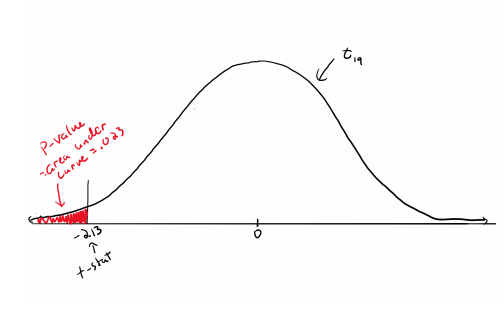

In [13]:
Image(filename = "C:/Users/patri/Desktop/Metrics TA/Images/6.png")

For HA : µ∆scraprate ̸= 0. We simply need to access the P value from before since this is just a two tailed test.


In [14]:
# 7. Two Tailed this is just our p value from before

print(p)

0.04468972800509544


The third alternative is HA : µ∆scraprate > 0, essentially making our null H0 : µ∆scraprate ≤ 0. Under this
alternative, our pvalue is extremely high we fail to reject at all plausible levels.

In [15]:
# 8. One tailed greater than test
oneTailed(t,p, 0.01, 'greater')
oneTailed(t,p, 0.05, 'greater')
oneTailed(t,p, 0.10, 'greater')

 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  1.0 %
 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  5.0 %
 The p value is  0.02234486400254772
Fail to Reject Null Hypothesis for greater-than test at  10.0 %


For this hypothesis test, the pvalue is the following areas:

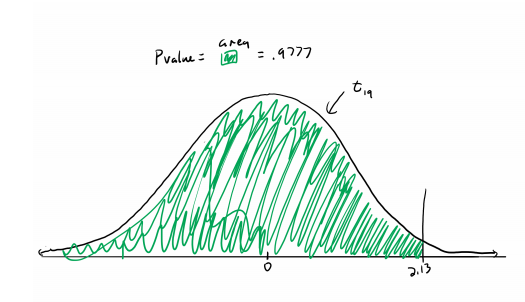

In [16]:
Image(filename = "C:/Users/patri/Desktop/Metrics TA/Images/8.png")

Here, the third alternative is probably of little interest. In this situation, we are likely most interested in the
first alternative hypothesis listed above (we assume that worker training does not have a negative effect). If we are
just interested in any departure from the null, we would use the second alternative hypothesis listed above. With
either of these alternatives, we would conclude that we would reject the null that there is no effect of training on
worker productivity at 5%.

